# Pymaceuticals Inc.
---
Purpose
The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

Study Format
In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured.

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset (6 points)
mousestudy = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')

# Display the data table for preview
mousestudy.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
# #using initial dataframe
# nmice=mouse_metadata["Mouse ID"].count()
# print(nmice)
#using combined dataframe (2 points)
nmice2 = mousestudy["Mouse ID"].nunique()
nmice2


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. (6 points)

df = pd.DataFrame(mousestudy.groupby(["Mouse ID","Timepoint"]).size().reset_index(name=
'count').sort_values("count",ascending = False))
df.head(10)



,Mouse ID,Timepoint,count
590,g989,20,2
589,g989,15,2
588,g989,10,2
587,g989,5,2
586,g989,0,2
0,a203,0,1
1264,q633,0,1
1260,q610,20,1
1261,q610,25,1
1262,q610,30,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mousedup = mousestudy.loc[mousestudy['Mouse ID']=="g989"]
mousedup


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. (4 points)
cleanmouse = mousestudy.loc [mousestudy["Mouse ID"]!="g989"]
cleanmouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame. (2 pts)
ncleanmouse = cleanmouse["Mouse ID"].nunique()
ncleanmouse

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. (10 pts = 2 pts per calculated statistic)
# Assemble the resulting series into a single summary DataFrame.
meanTV = cleanmouse["Tumor Volume (mm3)"].groupby(cleanmouse["Drug Regimen"]).mean().rename("Mean Tumor Volume")
medianTV = cleanmouse["Tumor Volume (mm3)"].groupby(cleanmouse["Drug Regimen"]).median().rename('Median Tumor Volume')
varianceTV = cleanmouse["Tumor Volume (mm3)"].groupby(cleanmouse["Drug Regimen"]).var().rename('Tumor Volume Variance')
stdevTV = cleanmouse["Tumor Volume (mm3)"].groupby(cleanmouse["Drug Regimen"]).std().rename('Tumor Volume Std. Dev.')
semTV = cleanmouse["Tumor Volume (mm3)"].groupby(cleanmouse["Drug Regimen"]).sem().rename('Tumor Volume Std. Error')
# print(meanTV)
# print(medianTV)
# print(varianceTV)
# print(stdevTV)
# print(semTV)
# type(semTV)


summaryTV = pd.concat([meanTV,medianTV,varianceTV,stdevTV,semTV], axis = 1, join = 'outer')

# # # # # Display the DataFrame (5 pts)

summaryTV



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

aggTV = cleanmouse["Tumor Volume (mm3)"].groupby(cleanmouse["Drug Regimen"]).agg(['mean','median','var','std','sem'])

# # # # # Display the DataFrame (not listed in requirements)
aggTV

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

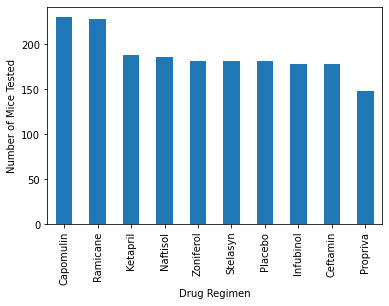

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas. (4.5 pts)
ntimesperdrug = cleanmouse["Mouse ID"].groupby(cleanmouse["Drug Regimen"]).count().sort_values(ascending = False)
# print(ntimesperdrug)
df = pd.DataFrame(ntimesperdrug)
# print(df)
barchart = df.plot(kind = "bar",legend=False)
barchart.set_ylabel('Number of Mice Tested')




Text(0, 0.5, 'Number of Mice Tested')

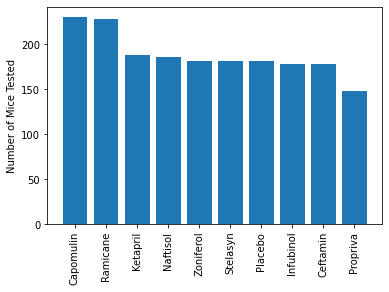

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot. (4.5 pts)

ntimesperdrug2 = cleanmouse["Mouse ID"].groupby(cleanmouse["Drug Regimen"]).count().sort_values(ascending = False)
# print(ntimesperdrug2)

prettybars=plt.bar(ntimesperdrug2.index,ntimesperdrug2)
plt.xticks(rotation = 90,ha='center')
plt.ylabel('Number of Mice Tested')



In [11]:
# print out the cleanmouse table for reference  CG
cleanmouse.head(1)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


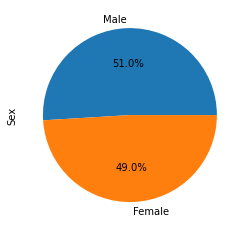

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas (3 pts)

gender = cleanmouse['Mouse ID'].groupby(cleanmouse["Sex"]).count().sort_values(ascending = False)
# print(gender)
genderdf = pd.DataFrame(gender)
genderdf.rename(columns = {'Mouse ID':'Sex'}, inplace=True)
# print(genderdf)

piechart = genderdf.plot.pie(y='Sex',legend=False,autopct='%1.1f%%')



c:\Users\chrisgru\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0, 0.5, 'Sex')

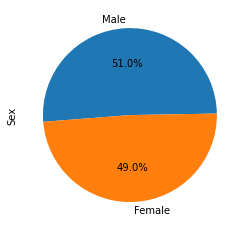

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot (3 pts)

gender2 = cleanmouse['Mouse ID'].groupby(cleanmouse["Sex"]).count().sort_values(ascending = False)
# print(gender2)

prettypie = plt.pie(gender2, labels=gender2.index,autopct="%1.1f%%", shadow=False, startangle=1)
plt.axes().set_ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [27]:
# print out the cleanmouse table for reference  CG
cleanmouse.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse (5 pts)
# index reset (2 pts)
# max timepoint retrieved for each mouse (2 pts)
LastTimepoint = pd.DataFrame(cleanmouse['Timepoint'].groupby(cleanmouse["Mouse ID"]).max().rename("Timepoint")).reset_index()
LastTimepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [38]:

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#chrisnote - can merge on two columns in later versions of python

MouseMaxTV = pd.merge(LastTimepoint,cleanmouse, on='Mouse ID')
mmtv = MouseMaxTV[MouseMaxTV["Timepoint_x"]==MouseMaxTV["Timepoint_y"]]
mmtv = mmtv.rename(columns={'Timepoint_x':'Timepoint'})
mmtv = mmtv.drop('Timepoint_y',axis='columns')

mmtv


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,67.973419,2
19,a251,45,Infubinol,Female,21,25,65.525743,1
29,a262,45,Placebo,Female,17,29,70.717621,4
39,a275,45,Ceftamin,Female,20,28,62.999356,3
46,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
1839,z435,10,Propriva,Female,12,26,48.710661,0
1849,z578,45,Ramicane,Male,11,16,30.638696,0
1859,z581,45,Infubinol,Female,24,25,62.754451,3
1869,z795,45,Naftisol,Female,13,29,65.741070,3


In [173]:
# Put treatments into a list for for loop (and later for plot labels) (3 points)
fourtreats = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fourtreats



['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [174]:
#create empty list to fill with tumor volume data (3 pts)

FinalTV = []



In [175]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #create dataframe with only the fourtreats
fourmmtv = mmtv.loc[mmtv['Drug Regimen'].isin(fourtreats)]
fourmmtv

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,67.973419,2
19,a251,45,Infubinol,Female,21,25,65.525743,1
39,a275,45,Ceftamin,Female,20,28,62.999356,3
66,a411,45,Ramicane,Male,3,22,38.407618,1
76,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
1812,y769,45,Ceftamin,Female,6,27,68.594745,4
1822,y793,45,Capomulin,Male,17,17,31.896238,2
1832,y865,45,Ceftamin,Male,23,26,64.729837,3
1849,z578,45,Ramicane,Male,11,16,30.638696,0


In [187]:
 
    # add subset
    # create groupby drug regimen lists of tumor volumes 
finalTV = fourmmtv.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
finalTV
    

Drug Regimen
Capomulin    [38.98287774, 38.93963263, 30.48598484, 37.074...
Ceftamin     [62.99935619, 45.0, 56.05774909, 55.74282869, ...
Infubinol    [67.97341878, 65.52574285, 57.03186187, 66.083...
Ramicane     [38.407618299999996, 43.04754260000001, 38.810...
Name: Tumor Volume (mm3), dtype: object

In [224]:
    
    # Determine outliers using upper and lower bounds

quartiles = pd.DataFrame(fourmmtv.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile([.25,.5,.75])).reset_index()
quartiles

testoutliers = quartiles.loc[quartiles['Drug Regimen']=='Infubinol']
testoutliers
# lowerq = testoutliers[0.25]
# lowerq
# upperq = testoutliers[0.75]
# iqr = upperq - lowerq
# iqr
# lowerbound = lowerq - (1.5 * iqr)
# print(lowerbound)
# upperbound = upperq + 1.5 * iqr
# upperbound
ilowerq= float(testoutliers.loc[testoutliers['level_1']==0.25]['Tumor Volume (mm3)'])
ilowerq
iupperq= float(testoutliers.loc[testoutliers['level_1']==0.75]['Tumor Volume (mm3)'])
iupperq
iiqr = iupperq - ilowerq
iiqr
ilowerbound = ilowerq - (1.5*iiqr)
iupperbound = iupperq + (1.5*iiqr)



# need to loop and create potential outlier lists or series?

print(f"Values below {ilowerbound} could be outliers.")
print(f"Values above {iupperbound} could be outliers.")


Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


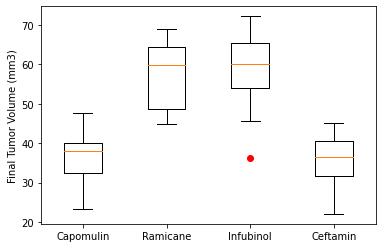

In [154]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# A box plot is generated that shows the distribution of the final tumor volume for all the mice in each treatment group. (5 points)
#https://matplotlib.org/stable/api/markers_api.html

fig1,ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(FinalTV,0,'ro',labels = fourtreats)
plt.show()



## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

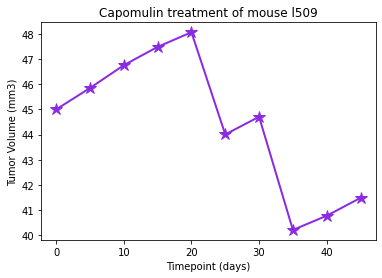

In [146]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin (5 pts)
#https://matplotlib.org/stable/api/markers_api.html
#https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png

om = cleanmouse[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
om
om2 = onemouse.loc[(onemouse['Drug Regimen']=='Capomulin')]
om2
om3 = om2.loc[(om2['Mouse ID'] == 'l509')]
om3

plt.plot(om3['Timepoint'],om3['Tumor Volume (mm3)'], color = 'blueviolet',marker = '*', linestyle = 'solid',linewidth = 2, markersize = 12)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

In [155]:
# print out the cleanmouse table for reference  CG
cleanmouse.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


Text(0, 0.5, 'Average Tumor Volume (mm3)')

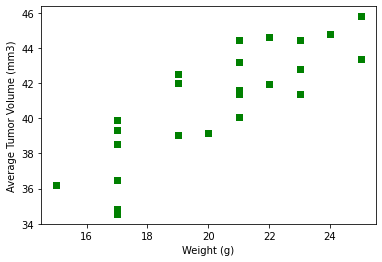

In [172]:
#A scatter plot is generated that shows average tumor volume vs. mouse weight for the Capomulin regimen. (5 points)
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#create capomulin regimen dataframe
capo = cleanmouse.loc[cleanmouse['Drug Regimen']=='Capomulin']
capo
# group by mouse id to get average tumor volume by mouse
mousewt = pd.DataFrame(capo['Tumor Volume (mm3)'].groupby(capo['Mouse ID']).mean().reset_index())
mousewt
#combine with original dataframe to get mouse weight and average tumor volume in same dataframe
combo = pd.merge(cleanmouse,mousewt,on="Mouse ID")
combo
#scatterplot fun
plt.scatter(combo['Weight (g)'],combo['Tumor Volume (mm3)_y'],color = 'green', marker = 's')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


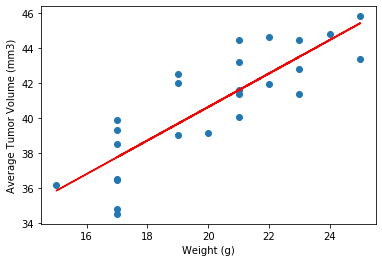

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

